In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns

In [2]:
full_data = pd.read_csv('full_data.csv')
full_data.date = pd.to_datetime(full_data.date)
cols = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths']
full_data[cols] = full_data[cols].apply(pd.to_numeric)

In [3]:
nl_data = full_data[full_data.location=='Netherlands']
it_data = full_data[full_data.location=='Italy']
#up to date
nl_data.head(100)

,date,location,new_cases,new_deaths,total_cases,total_deaths
3898,2019-12-31,Netherlands,0,0,0,0
3899,2020-01-01,Netherlands,0,0,0,0
3900,2020-01-02,Netherlands,0,0,0,0
3901,2020-01-03,Netherlands,0,0,0,0
3902,2020-01-04,Netherlands,0,0,0,0
...,...,...,...,...,...,...
3975,2020-03-17,Netherlands,278,4,1413,24
3976,2020-03-18,Netherlands,292,0,1705,24
3977,2020-03-19,Netherlands,346,34,2051,58
3978,2020-03-20,Netherlands,409,18,2460,76


## Compare The Netherlands Vs Italy

In [16]:
start_italy = it_data[it_data.new_cases!=0].date.iloc[0]
start_nl = nl_data[nl_data.new_cases!=0].date.iloc[0]

today = datetime.datetime.today()
range_dates_it = pd.date_range(start_italy,today).to_pydatetime().tolist()
range_dates_nl = pd.date_range(start_nl,today).to_pydatetime().tolist()
#it's possible to do the same for other countries

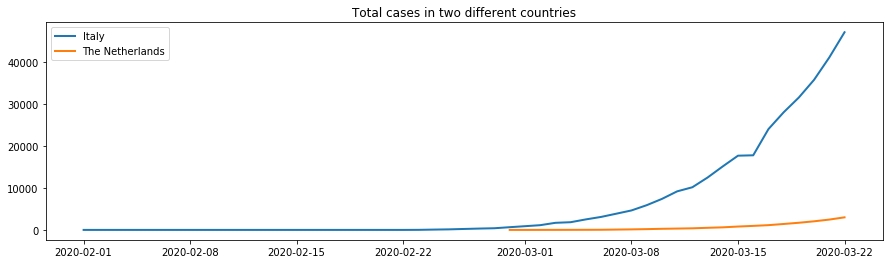

In [18]:
fig = plt.figure(figsize=(15,4))
plt.plot(range_dates_it[1:], it_data.loc[it_data.date.isin(range_dates_it)].total_cases,lw=2,label='Italy')
plt.plot(range_dates_nl[1:], nl_data.loc[nl_data.date.isin(range_dates_nl)].total_cases,lw=2,label='The Netherlands')
plt.title('Total cases in two different countries')
plt.legend()
plt.show()

### Compute growth for death and total cases
##### Are the measures against coronavirus effective ?

In [13]:
def perc_growth(sequence):
    return [round(100 * (b - a) / a,2) if a !=0 and b!=0 else 0 for a, b in zip(sequence[:], sequence[1:])]

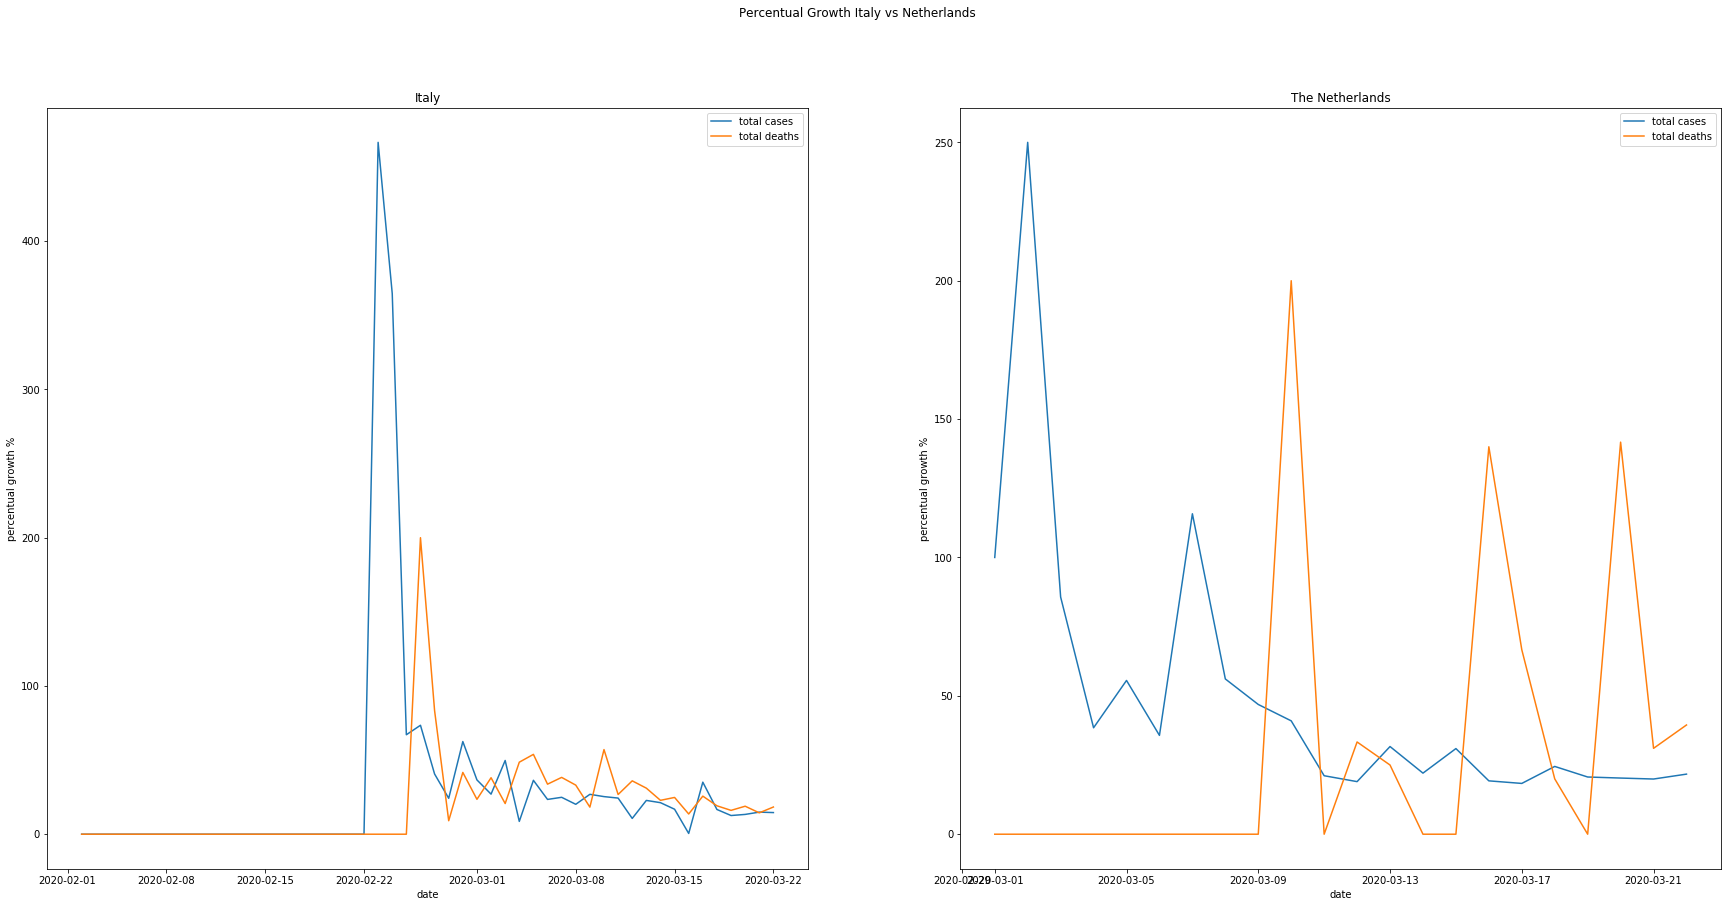

In [20]:
it_perc_growth = it_data[it_data.total_cases!=0][cols].apply(perc_growth)
nl_perc_growth = nl_data[nl_data.total_cases!=0][cols].apply(perc_growth)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(30,14))
fig.suptitle('Percentual Growth Italy vs Netherlands')

ax1.plot(range_dates_it[2:],it_perc_growth.total_cases,label='total cases');
ax1.plot(range_dates_it[2:],it_perc_growth.total_deaths,label='total deaths');
ax1.legend()
ax1.set(title='Italy',xlabel='date',ylabel='percentual growth %');


ax2.plot(range_dates_nl[2:],nl_perc_growth.total_cases,label='total cases');
ax2.plot(range_dates_nl[2:],nl_perc_growth.total_deaths,label='total deaths');
ax2.legend()
ax2.set(title='The Netherlands',xlabel='date',ylabel='percentual growth %');

#TODO: add notation on the government decision 

### Italian Region


In [23]:
import os
os.getcwd()

'/Users/andreafavia/Desktop/EIT/TU:e/fruitpunch/AI_HEALTHCARE/Fruitpunch-AI-Covid-19/Impact on Health'

In [29]:
italy_regions = pd.read_csv('dpc-covid19-ita-regioni.csv')
italy_regions.tail(10)
df = italy_regions.dropna().sort_values(by=['denominazione_regione', 'data'])
df_lastday = df[df.data == df.data.max()]

df.head(5)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
557,2020-03-21 17:00:00,ITA,14,Molise,41.557748,14.659161,21,6,27,20,47,8,7,7,61,449
558,2020-03-21 17:00:00,ITA,1,Piemonte,45.073274,7.680687,1976,301,2277,1229,3506,262,8,238,3752,10701
559,2020-03-21 17:00:00,ITA,16,Puglia,41.125596,16.867367,209,33,242,400,642,91,4,29,675,5617
560,2020-03-21 17:00:00,ITA,20,Sardegna,39.215312,9.110616,65,16,81,240,321,33,5,4,330,2297
561,2020-03-21 17:00:00,ITA,19,Sicilia,38.115697,13.362357,206,48,254,204,458,79,26,6,490,4883
562,2020-03-21 17:00:00,ITA,9,Toscana,43.769231,11.255889,664,202,866,1039,1905,192,35,72,2012,11909
563,2020-03-21 17:00:00,ITA,4,P.A. Trento,46.068935,11.121231,233,39,272,448,720,120,34,28,782,2656
564,2020-03-21 17:00:00,ITA,10,Umbria,43.106758,12.388247,92,29,121,326,447,63,5,10,462,2712
565,2020-03-21 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,62,15,77,227,304,47,1,8,313,884
566,2020-03-21 17:00:00,ITA,5,Veneto,45.434905,12.338452,942,249,1191,3023,4214,537,257,146,4617,53642


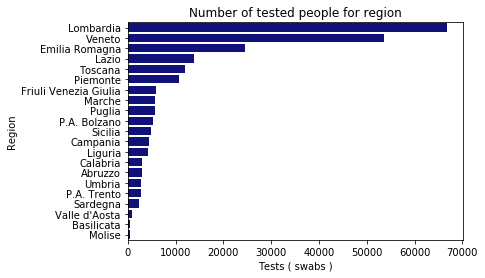

In [76]:
tested = sns.barplot(data=df_lastday.sort_values(by='tamponi')[::-1],y='denominazione_regione',x='tamponi',color='darkblue',);
tested.set_title('Number of tested people for region')
tested.set_xlabel('Tests ( swabs )')
tested.set_ylabel('Region')
plt.show()

Number of ppl in Intensive-Cure units

Text(0, 0.5, 'Region')

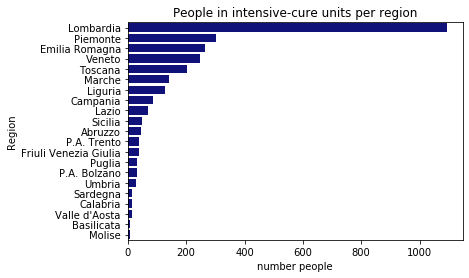

In [79]:
tested = sns.barplot(data=df_lastday.sort_values(by='terapia_intensiva')[::-1],y='denominazione_regione',x='terapia_intensiva',color='darkblue',);
tested.set_title('People in intensive-cure units per region')
tested.set_xlabel('number people')
tested.set_ylabel('Region')

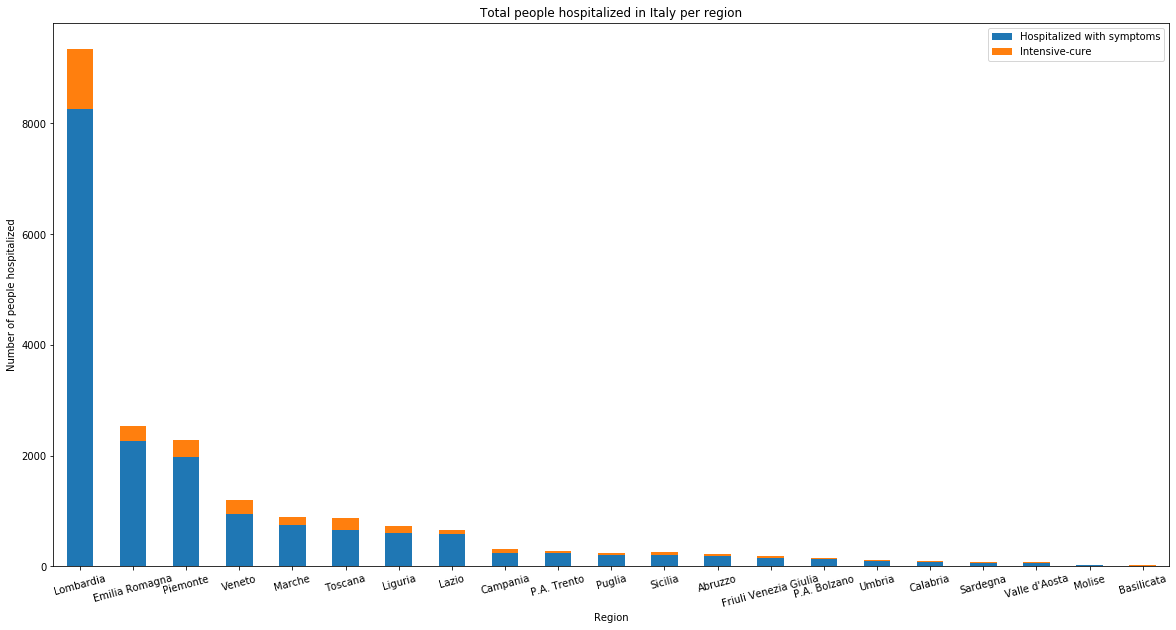

In [606]:
ax = df_lastday.sort_values(by='ricoverati_con_sintomi')[::-1][['denominazione_regione','ricoverati_con_sintomi','terapia_intensiva']].plot.bar(
    stacked=True,
    x='denominazione_regione',
    rot=15,
    figsize=(20,10))

ax.set(title='Total people hospitalized in Italy per region',xlabel='Region',ylabel='Number of people hospitalized',)
ax.legend(['Hospitalized with symptoms','Intensive-cure '])
plt.show()

Text(0, 0.5, 'Region')

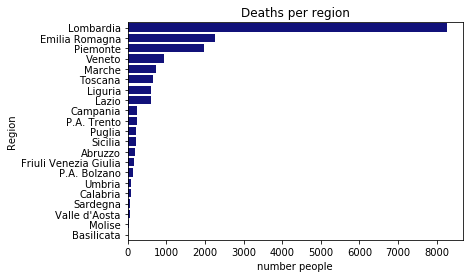

In [561]:
tested = sns.barplot(data=df_lastday.sort_values(by='ricoverati_con_sintomi')[::-1],y='denominazione_regione',x='ricoverati_con_sintomi',color='darkblue',);
tested.set_title('People Hospitalized')
tested.set_xlabel('number people')
tested.set_ylabel('Region')

Text(0, 0.5, 'Region')

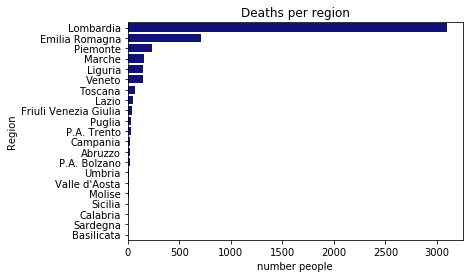

In [555]:
tested = sns.barplot(data=df_lastday.sort_values(by='deceduti')[::-1],y='denominazione_regione',x='deceduti',color='darkblue',);
tested.set_title('Deaths per region')
tested.set_xlabel('number people')
tested.set_ylabel('Region')

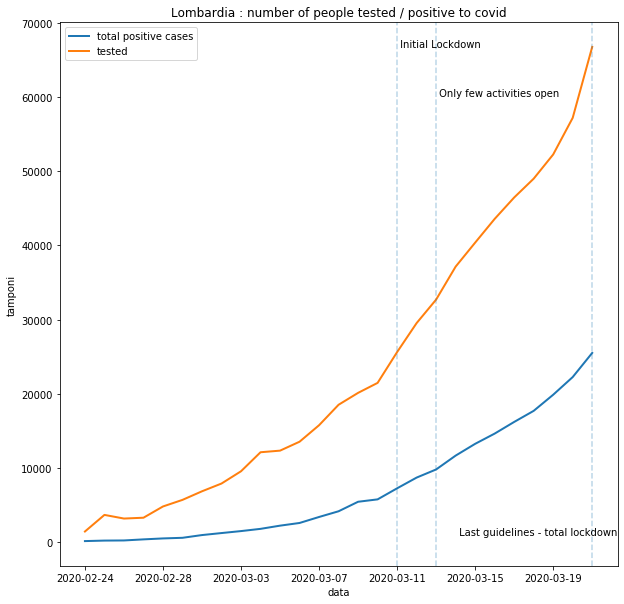

In [595]:
#You can change the region
region_name = 'Lombardia'
region = df[df.denominazione_regione ==region_name]

fig = plt.figure(figsize=(10,10))

ax = sns.lineplot(x='data',y='totale_casi',data=region,label='total positive cases',lw=2)#
ax = sns.lineplot(x='data',y='tamponi',data=region,label='tested',lw=2)
ax.set_title('{} : number of people tested / positive to covid'.format(region_name))
ax.set_xticks(region.data.to_list()[::4])

#what's the percentage of ppl resulted positive with the test ? 
tot_tests = region[region.data == region.data.max()].tamponi.iloc[0]
tot_covid = region[region.data == region.data.max()].totale_casi.iloc[0]
#fig.text(0.9, 0.86,'Last day % of people positive after the test: {} %'.format(round(tot_covid/tot_tests*100)), fontsize=9,horizontalalignment='right',verticalalignment='top',)


#annotate on government policies
x_line_annotation = dt.datetime(2020,3,11)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=x_line_annotation,y = tot_tests-10,s=' Initial Lockdown')

x_line_annotation = dt.datetime(2020,3,13)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=x_line_annotation,y = tot_tests-0.1*tot_tests,s=' Only few activities open')


x_line_annotation = dt.datetime(2020,3,21)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=dt.datetime(2020,3,14),y = 1000,s=' Last guidelines - total lockdown')


plt.show()

### Italy: tests vs covid-19

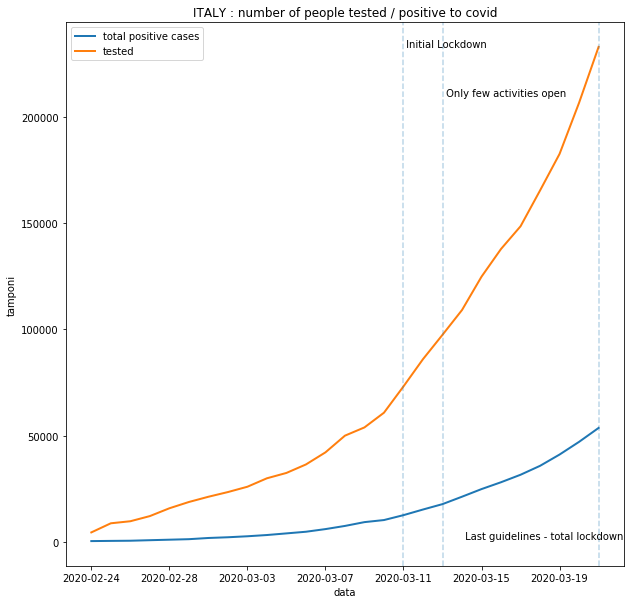

In [596]:
italy_tot = df.groupby(by='data').agg('sum').reset_index()

fig = plt.figure(figsize=(10,10))

ax = sns.lineplot(x='data',y='totale_casi',data=italy_tot,label='total positive cases',lw=2)#
ax = sns.lineplot(x='data',y='tamponi',data=italy_tot,label='tested',lw=2)
ax.set_title('ITALY : number of people tested / positive to covid'.format(region_name))
ax.set_xticks(italy_tot.data.to_list()[::4])

#what's the percentage of ppl resulted positive with the test ? 
tot_tests = italy_tot[italy_tot.data == italy_tot.data.max()].tamponi.iloc[0]
tot_covid = italy_tot[italy_tot.data == italy_tot.data.max()].totale_casi.iloc[0]
#fig.text(0.9, 0.86,'Last day % of people positive after the test: {} %'.format(round(tot_covid/tot_tests*100)), fontsize=9,horizontalalignment='right',verticalalignment='top',)


#annotate on government policies
x_line_annotation = dt.datetime(2020,3,11)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=x_line_annotation,y = tot_tests-10,s=' Initial Lockdown')

x_line_annotation = dt.datetime(2020,3,13)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=x_line_annotation,y = tot_tests-0.1*tot_tests,s=' Only few activities open')


x_line_annotation = dt.datetime(2020,3,21)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=dt.datetime(2020,3,14),y = 1000,s=' Last guidelines - total lockdown')


plt.show()

### New people with covid-19
Are the measures effective to reduce number of people infected ?

In [598]:
italy_tot.head(5)

,data,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24,214,903.972147,256.745065,101,26,127,94,221,221,1,7,229,4324
1,2020-02-25,214,903.972147,256.745065,114,35,150,162,311,90,1,10,322,8623
2,2020-02-26,214,903.972147,256.745065,128,36,164,221,385,74,3,12,400,9587
3,2020-02-27,214,903.972147,256.745065,248,56,304,284,588,203,45,17,650,12014
4,2020-02-28,214,903.972147,256.745065,345,64,409,412,821,233,46,21,888,15695


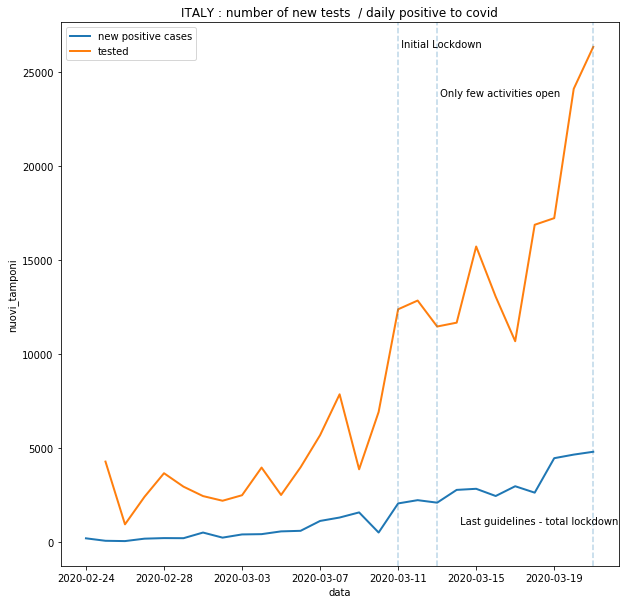

In [599]:
italy_tot = df.groupby(by='data').agg('sum').reset_index()
nuovi_tamponi = [b - a for a,b in zip(italy_tot.tamponi,italy_tot.tamponi[1:])]
nuovi_tamponi.insert(0,np.nan)
italy_tot['nuovi_tamponi'] = nuovi_tamponi

fig = plt.figure(figsize=(10,10))

ax = sns.lineplot(x='data',y='nuovi_attualmente_positivi',data=italy_tot,label='new positive cases',lw=2)#
ax = sns.lineplot(x='data',y='nuovi_tamponi',data=italy_tot,label='tested',lw=2)
ax.set_title('ITALY : number of new tests  / daily positive to covid'.format(region_name))
ax.set_xticks(italy_tot.data.to_list()[::4])

#what's the percentage of ppl resulted positive with the test ? 
tot_tests = italy_tot[italy_tot.data == italy_tot.data.max()].nuovi_tamponi.iloc[0]
tot_covid = italy_tot[italy_tot.data == italy_tot.data.max()].totale_casi.iloc[0]
#fig.text(0.9, 0.86,'Last day % of people positive after the test: {} %'.format(round(tot_covid/tot_tests*100)), fontsize=9,horizontalalignment='right',verticalalignment='top',)


#annotate on government policies
x_line_annotation = dt.datetime(2020,3,11)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=x_line_annotation,y = tot_tests-10,s=' Initial Lockdown')

x_line_annotation = dt.datetime(2020,3,13)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=x_line_annotation,y = tot_tests-0.1*tot_tests,s=' Only few activities open')


x_line_annotation = dt.datetime(2020,3,21)
ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
ax.text(x=dt.datetime(2020,3,14),y = 1000,s=' Last guidelines - total lockdown')


plt.show()

### Total cases per region from the first infected patient registered

In [603]:
tot_diff = (df.data.max() - df.data.min()).days

tot_cases, tot_deaths, tot_hospitalized, tot_icu = {},{},{},{}

for region in df.groupby(by=['denominazione_regione']):
    tot_cases[region[0]] = region[1].totale_casi.to_list()
    tot_deaths[region[0]] = region[1].deceduti.to_list()
    tot_hospitalized[region[0]] = region[1].totale_ospedalizzati.to_list()
    tot_icu[region[0]] = region[1].terapia_intensiva.to_list()
    
cum_tot_cases = pd.DataFrame(tot_cases)   
cum_tot_hospitalized = pd.DataFrame(tot_hospitalized)
cum_tot_icu = pd.DataFrame(tot_icu)   
cum_tot_deaths = pd.DataFrame(tot_deaths)

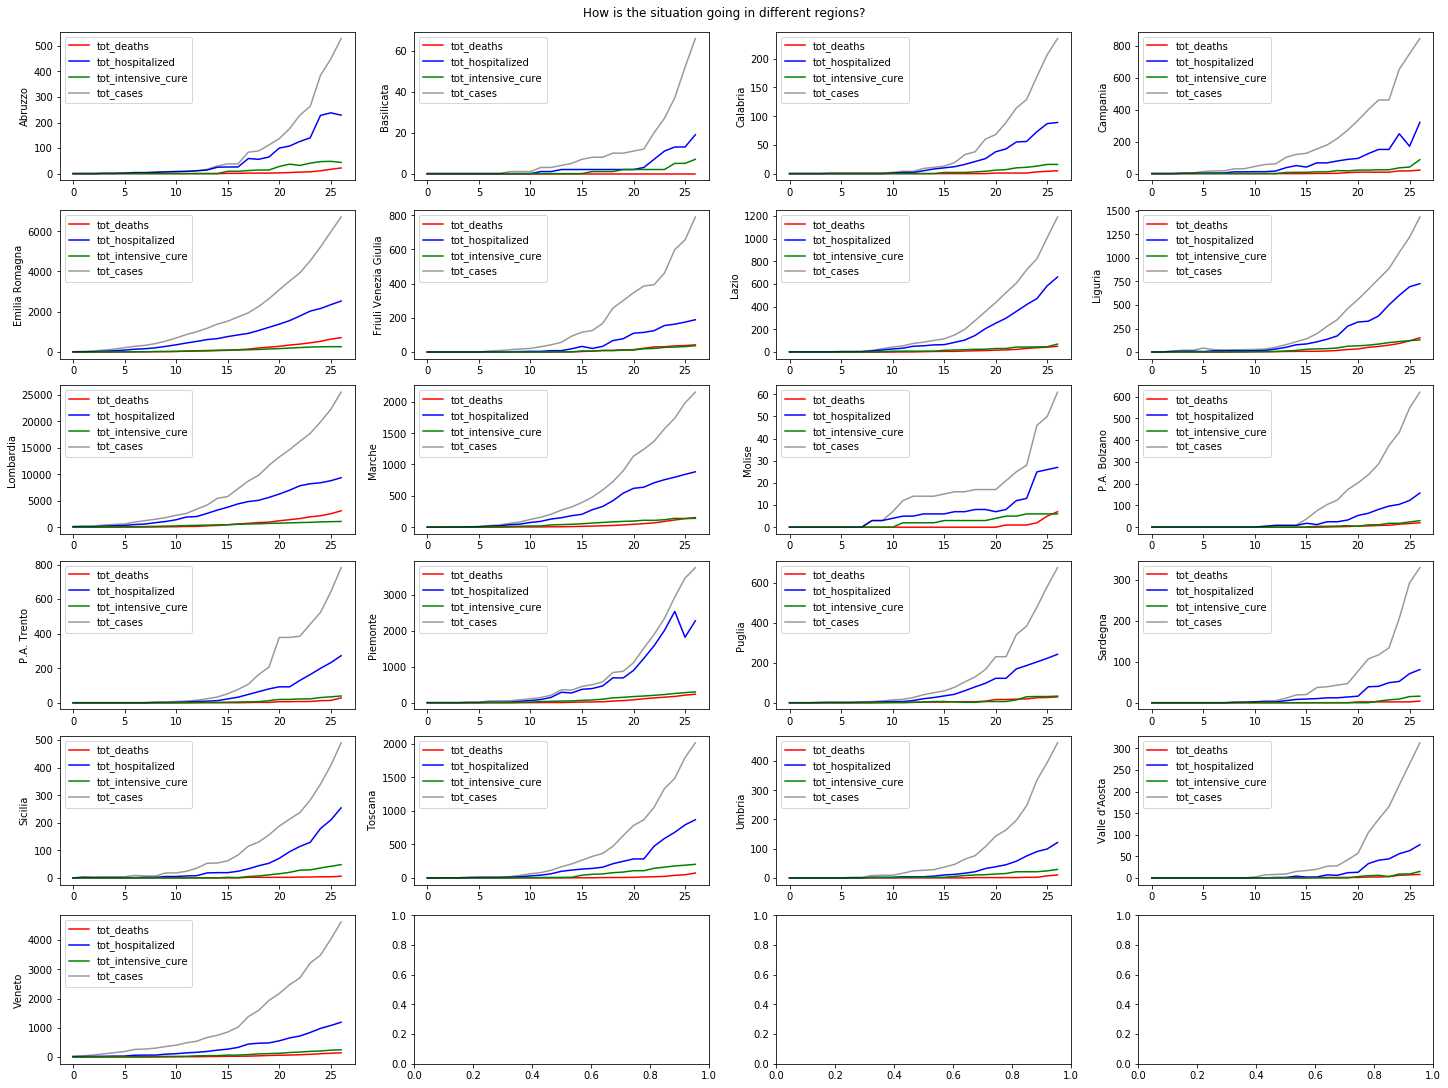

In [604]:
fig, axes = plt.subplots(6,4,figsize=(20,15),constrained_layout=True)

regions = cum_tot_cases.columns.to_list()
k=0
for i in range(6):
    for j in range(4):
        sns.lineplot(y=regions[k],x= cum_tot_deaths.index.to_list(), data=cum_tot_deaths, ax=axes[i,j],color='r',label='tot_deaths')
        sns.lineplot(y=regions[k],x= cum_tot_hospitalized.index.to_list(),data = cum_tot_hospitalized,ax=axes[i,j],color='b',label='tot_hospitalized')
        sns.lineplot(y=regions[k],x= cum_tot_icu.index.to_list(),data = cum_tot_icu,ax=axes[i,j],color='g',label='tot_intensive_cure')
        
        sns.lineplot(y=regions[k],x= cum_tot_cases.index.to_list(),data = cum_tot_cases,ax=axes[i,j],color='k',label='tot_cases',alpha=.4)
        k=k+1
        if k == 21: break
fig.suptitle('How is the situation going in different regions?')
plt.show()


#### How 's the situation in the south  ? 
The goal is not to stress the healthcare system. There are a fixed number of intensive-cure units (ICU) in the hospitals. Overall, the healthcare in the south of Italy is worse compared to other regions in the north. Hence, keeping the number of people in ICU is essential to avoid anpleasent consequences


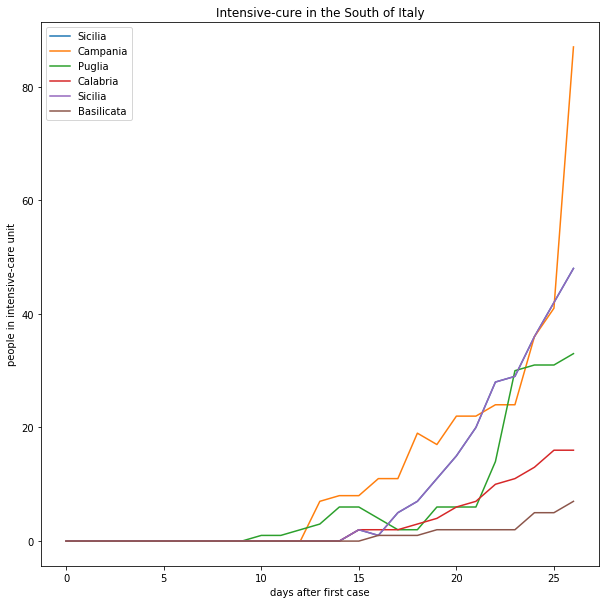

In [549]:
ax = cum_tot_icu.plot(y=['Sicilia','Campania','Puglia','Calabria','Sicilia','Basilicata'],figsize=(10,10),kind='line')
ax.set(title='Intensive-cure in the South of Italy',xlabel='days after first case',ylabel='people in intensive-care unit')
plt.show()


df_cum